# Medical Data Visualizer

##### This is one of the projects developed to claim Data Analysis with Python Certification of freecodecamp web page. Step by step will be showing the results 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# First Step import the dataset
df = pd.read_csv("medical_examination.csv")


### Adding "overweight" column  

In [4]:
df['overweight'] = ((df["weight"]/((df["height"]/100)**2)) > 25).astype(int)
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


### Replacing "cholesterol" and "gluc" values by 1 if they are greater than 1 else replacing by 0

In [205]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df[['gluc']]=(df[['gluc']] > 1).astype(int)
df[['cholesterol']]=(df[['cholesterol']] > 1).astype(int)
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


### Draw Categorical Plot

The dataset should be split by 'cardio' so there is one chart for each cardio value.

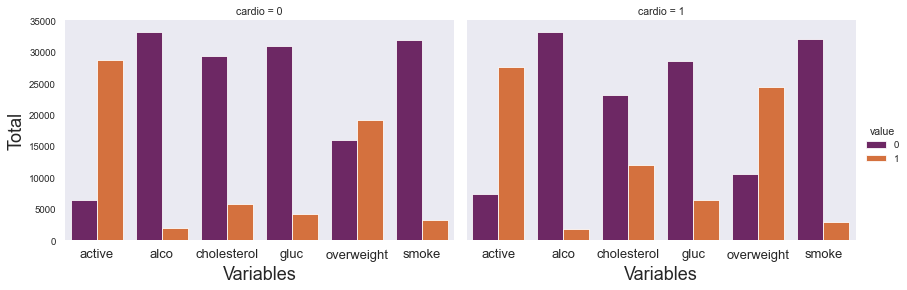

In [320]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['active','alco','cholesterol', 'gluc','overweight', 'smoke'])
    
    fig=sns.catplot(data=df_cat, kind='count',x='variable',hue='value',col='cardio',height=4,aspect=1.5,palette="inferno")
   
    
    fig.set_axis_labels("Variables","Total",fontdict={"size":18})
    fig.set_xticklabels(fontdict={"size":13})
    fig.set(ylim=(0,35000))
    sns.set_context("paper",font_scale=1.1)
    sns.despine()
    
    fig.savefig('catplot.png')
    #return fig
draw_cat_plot()

### Draw Heat Map

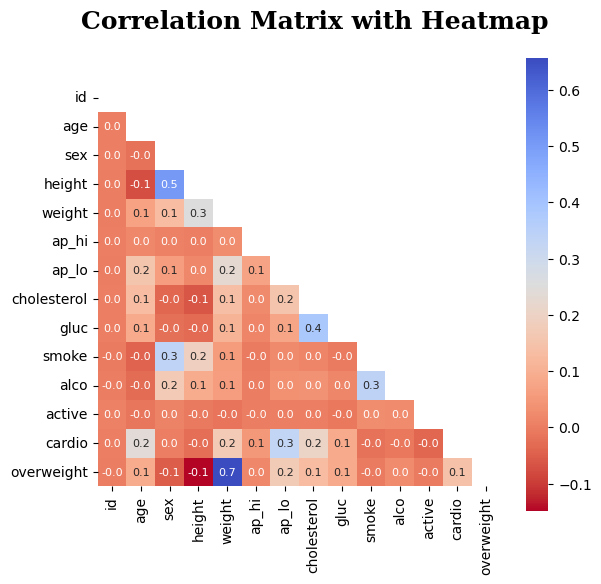

In [290]:
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo']<=df['ap_hi'])&
        (df['height']>=df['height'].quantile(0.025))&
        (df['height']<=df['height'].quantile(0.975))&
        (df['weight']>=df['weight'].quantile(0.025))&
        (df['weight']<=df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)



    # Set up the matplotlib figure
    
    fig=plt.figure(figsize=(6.5, 6), dpi=100)
    
    # Draw the heatmap with 'sns.heatmap()'
    
    cmap="coolwarm_r"
    ax=sns.heatmap(corr,mask=mask,annot=True,fmt='0.1f',square=True,annot_kws={"size":8},cmap=cmap)
    plt.title('Correlation Matrix with Heatmap',fontsize=18,loc="left",x=0.1,y=0.93,transform=fig.transFigure,fontweight="bold",fontfamily="serif")
    plt.tick_params(axis="both",labelsize=10)
    
    # Do not modify the next two lines
    fig.savefig('heatmap'+cmap+".png")
    #return fig
draw_heat_map()

## Now the project it's ready